Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from doomrnn import reset_graph, ConvVAE

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "tf_models"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [6]:
obs.shape

(322, 64, 64, 3)

In [7]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [8]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


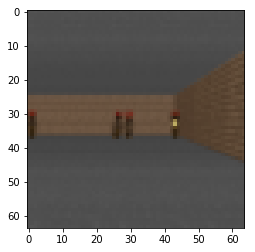

In [9]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [10]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 0.6558  2.2843 -0.2154 -0.0394  1.3444  0.4856  0.3698  0.812  -0.1616  0.5653 -0.5786 -0.6212
  1.1814 -0.1323  0.3489  1.6647  0.3601 -0.1382  0.5157 -0.8867 -0.4893 -0.6843 -0.4475 -2.2301
 -0.637   0.2072  1.2071 -0.3749 -0.3331 -2.4372  0.3665  0.2017  0.6546  0.0962 -0.6875 -0.3171
  0.4405  0.302  -0.0742  0.3015 -0.492  -1.0579  0.4566 -0.1186  0.3621  0.3744 -0.0777  1.6202
 -0.506   0.1278 -0.5952 -0.0783  0.3135 -1.2906 -0.7061 -0.476   0.9175 -0.5542  1.3685  0.0769
  1.4983  1.5979 -1.0412 -1.2206]


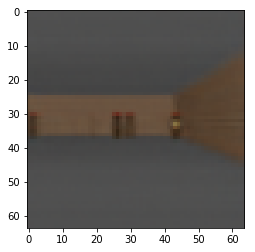

In [11]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()